# Fort63

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
from adcircpy.outputs import Fort63

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
import os
from src.constants import KAT_EX_PATH

In [4]:
os.listdir(KAT_EX_PATH)

['minpr.63.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'run.sh',
 'adcirc_log.txt',
 'maxele.63.nc',
 'comparison.log',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'control',
 'fort.224',
 'fort.223',
 'fort.222']

In [8]:
path = os.path.join(KAT_EX_PATH, "fort.63.nc")

In [45]:
xr.open_dataset(path, decode_cf=False)

ValueError: dimension 'neta' already exists as a scalar variable

In [10]:
fort63 = Fort63(path)

In [12]:
fort63.values.shape

(8303,)

In [14]:
fort63.x.shape

(8303,)

In [15]:
fort63.y.shape

(8303,)

In [21]:
import matplotlib.pyplot as plt

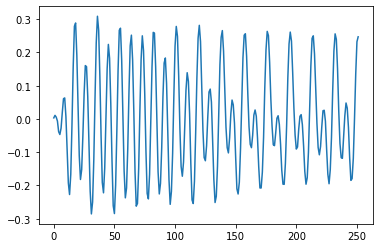

In [22]:
plt.plot(fort63._ptr["zeta"][:, 3333])

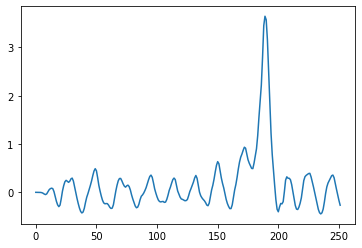

In [35]:
plt.plot(fort63._ptr["zeta"][:, indices][:, 27])

In [42]:
fort63._ptr["zeta"][:, indices][::3, 27].shape

(84,)

In [43]:
fort63._ptr["time"]

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: model time
    standard_name: time
    units: seconds since 2020-04-28 00:00:00
    base_date: 2020-04-28 00:00:00
unlimited dimensions: time
current shape = (252,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [36]:
from src.constants import DATA_PATH

In [37]:
import xarray as xr

In [39]:
xr.open_dataarray(os.path.join(DATA_PATH, "fort.217.nc"))[:, :, 0]

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.DataArray (time: 56, lat: 46, lon: 60)>
[154560 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -90.28 -90.23 -90.18 -90.13 ... -87.43 -87.38 -87.33
  * lat      (lat) float64 28.6 28.65 28.7 28.75 28.8 ... 30.7 30.75 30.8 30.85
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Attributes:
    long_name:    Pressure
    description:  Surface pressure
    units:        mb

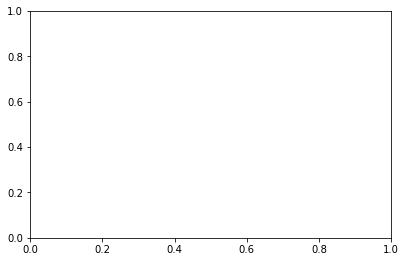

In [27]:
fort63.animation(start_frame=0, end_frame=200)

In [33]:
import numpy as np
from src.constants import NO_BBOX


@np.vectorize
def indices_in_bbox(lon, lat):
    return (
        lon > NO_BBOX.lon[0]
        and lon < NO_BBOX.lon[1]
        and lat > NO_BBOX.lat[0]
        and lat < NO_BBOX.lat[1]
    )


indices = indices_in_bbox(fort63.x, fort63.y)

In [34]:
indices

array([False, False, False, ..., False, False, False])